<a href="https://colab.research.google.com/github/GuilhermeRuy97/BootcampDataScience/blob/main/resumo_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Média, moda e mediana

In [11]:
import pandas as pd
from zipfile import ZipFile

caminho = "/content/drive/MyDrive/cursos/bootcampDSalura/dados modulo 3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [12]:
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

## <font color=green>1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

ou seja, soma dos valores dividida pelo número de elementos

In [13]:
#Fazendo a média

media = dados["IMC"].mean()
print(media)

20.95825220663186


## <font color=green>2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [14]:
mediana = dados["IMC"].median()
print(mediana)

20.190504330368643


## <font color=green>3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [15]:
moda = dados["IMC"].mode()
print(moda)

#no caso esta é multimodal (várias modas)

0     16.155478
1     16.718248
2     17.312886
3     18.543714
4     18.556681
5     18.602766
6     19.021555
7     19.169550
8     19.297399
9     19.707910
10    21.082813
dtype: float64


## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

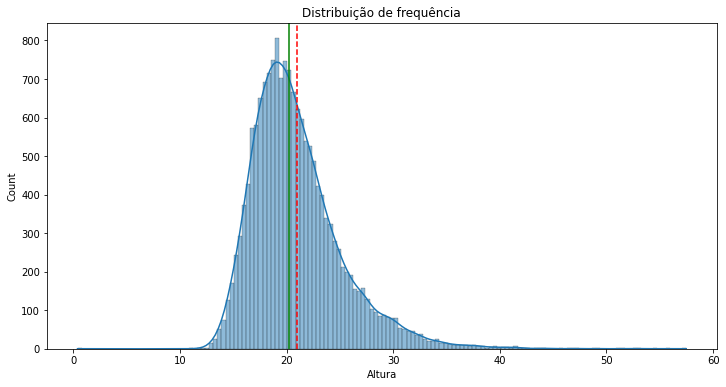

In [16]:
import seaborn as sns

ax = sns.histplot(x = "IMC", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.axvline(dados.IMC.mean(), color = 'r', linestyle = '--')
ax.axvline(dados.IMC.median(), color ='g', linestyle = '-')

ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

#É possível ver a média em vermelho e a mediana em verde

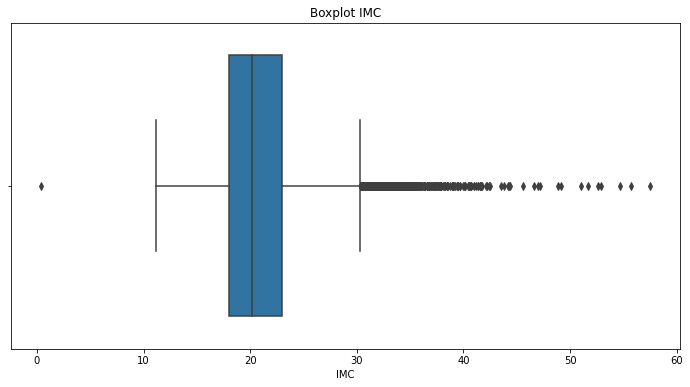

In [17]:
#Também é possível perceber a assimetria através do boxplot

ax = sns.boxplot(x = "IMC", data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot IMC")
ax.set_xlabel("IMC")
ax;

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# Distribuição Normal

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)


## Carcterísticas importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

## $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

Por exemplo, a probabilidade de se escolher uma pessoa entre 1,60m e 1,80m é a área sob a curva.


![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:


## $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior



## Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

Exemplo:

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

Note que até 1,70m a probabilidade é de 50%, pois a curva é simétrica

#### Solução 1

In [ ]:
#Criando a tabela padronizada utilizando o scypy
#Essa tabela geralmente é encontrada em livros de estatística

import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

In [ ]:
media = 1.70
desvio_padrao = 0.1
x = 1.80
z = (x - media)/ desvio_padrao
print(z)
print("probabilidade = 0.8413")

#Com o resultado de z = 1, procura-se na tabela por z = 01.00 e valor 0.00 para se obter o valor 0.8413
#Caso Z = 1.05 por exemplo, procura-se por 1.00 e depois por 0.05 ao lado, ou seja, 0.8531

#### Solução 2

In [ ]:
#Podemos passar o valor de z com a função .cdf()

from scipy.stats import norm
probabilidade = norm.cdf(z)
print(probabilidade)

# Teorema do Limite Central

## O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.


.
## $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$
​
## O desvio padrão das médias amostrais é conhecido como **erro padrão da média**


In [ ]:
import pandas as pd
from zipfile import ZipFile



caminho = "/content/drive/MyDrive/cursos/bootcampDSalura/dados modulo 3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

In [ ]:
dados["IMC"] = dados["VB17003"]/ ((dados["VB17004"]/100)**2)
dados["IMC"]

In [ ]:
#Criando a amostra de 1500 amostras de 2000 elementos

n = 2000
total_de_amostras = 1500
amostras = pd.DataFrame()
for i in range(total_de_amostras):
  _ = dados.IMC.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

amostras

## O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [ ]:
amostras.mean().hist(bins=30)

## O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [ ]:
dados.IMC.mean()

In [ ]:
amostras.mean().mean()

##O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [ ]:
n

In [ ]:
#O desvio padrão se da pelo .std()

import numpy as np

desvio_padrao_amostra_aproximado = dados.IMC.std() / np.sqrt(n)
print(desvio_padrao_amostra_aproximado)

In [ ]:
amostras.mean().std()

# Gráficos com Ploty

Existe outra biblioteca para gráficos chama de Ploty, especialmente interessantes para compartilhar o trabalho na web

In [ ]:
#Obs, este módulo necessita dos dados do arquivo módulo_1_e_2_Bootcamp_Alura.ipynb

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

#import pandas as pd
#import plotly.offline as py
#import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)

#mais informações sobre gráficos interativos em https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['11 Rondônia'],name='Rondônia'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['12 Acre'],name='Acre'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['13 Amazonas'],name='Amazonas'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['14 Roraima'],name='Roraima'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['15 Pará'],name='Pará'))

fig.show()

In [ ]:
fig2 = px.bar(x=gastos_do_ultimo_mes.index, 
              y=gastos_do_ultimo_mes,labels={'x':'Unidade da Federação','y':'Gastos'})

fig2.show()

In [ ]:
#É possível salvar a imagem

fig2.write_html('imagem.html')

# Estilizar DataFrames com Pandas

In [19]:
import pandas as pd

In [20]:
carros = {'Marca': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Preco': [22000,25000,27000,35000]
        }

In [21]:
dados = pd.DataFrame(carros)

dados.head()

,Marca,Preco
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [22]:
dados.style.set_properties(**{'background-color':'blue',
                              'color':'white',
                              'border-color':'black'
                              })

,Marca,Preco
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [23]:
def cor_orcamento(val):

  if val <= 25000:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color

In [24]:
dados.style.applymap(cor_orcamento, subset = 'Preco')

,Marca,Preco
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [25]:
#Podemos salvar em um arquivo excel

dados.style.applymap(cor_orcamento, subset = 'Preco').to_excel("estilizado.xlsx", engine = 'openpyxl')

#Pode-se notar nos arquivos sample_data do colab que o arquivo foi criado

# Intervalo de confiança e População e Amostra

In [26]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

https://archive.ics.uci.edu/ml/datasets/Wine

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [27]:
import pandas as pd

In [28]:
vinho = pd.read_csv(url, sep = ';')

In [62]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
#Olhando quantas amostras temos

vinho.shape

(1599, 12)

## Qual a chance da nossa amostra retratar a realidade?

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

## $$e = z \frac{\sigma}{\sqrt{n}}$$

Suponha que a densidade do vinho se distribui aproximadamente como uma normal. Calcule o desvio padrão e a média de uma amostra de 1000 elementos. Construa um intervalo de confiança para a média populacional assumindo um **nível de significância de 5%**.

In [63]:
#Definindo uma amostra com n = 1000 e uma seed random_state = 202

amostra = vinho.sample(n = 1000, random_state = 202)

In [32]:
desvio_padrao = amostra['density'].std()

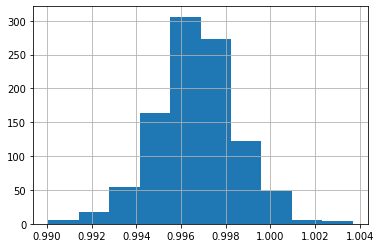

In [33]:
amostra['density'].hist()

In [34]:
significancia = 0.05

In [35]:
confianca = 1 - significancia

In [40]:
n = 1000

### Obtendo z - Tabela normal padronizada.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

In [38]:
#Importando a numpy para fazer a raiz quadrada

import numpy as np

In [41]:
sigma = desvio_padrao / np.sqrt(n)

obtendo o $e$

In [43]:
z = 1.96

In [44]:
erro = z * sigma

In [45]:
erro

0.00011422344106370019

### Calculando o intervalo de confiança

In [46]:
media_amostra = amostra['density'].mean()

In [47]:
intervalo = [media_amostra - erro, media_amostra + erro]

In [48]:
intervalo

[0.9965902065589372, 0.9968186534410646]

In [49]:
#Forma alternativa utilizando a scipy com a norm para calcular no intervalo

from scipy.stats import norm

In [51]:
norm.interval(alpha=0.95, loc=media_amostra, scale=sigma)

(0.9965902086578197, 0.9968186513421821)

## Calculando o tamanho da amostra

Vamos assumir que queremos um erro máximo de 0.0001, nível de confiança de 95% e o desvio padrão populacional é 0.0019.

\begin{equation}
e = z \frac{\sigma}{\sqrt{n}}
\end{equation}
Com desvio padrão conhecido
\begin{equation}
n = \left( z \frac{\sigma}{e} \right)^2
\end{equation}
Com desvio padrão desconhecido
\begin{equation}
n = \left( z \frac{s}{e} \right)^2
\end{equation}


In [52]:
0.95 + 0.025

0.975

In [53]:
#Passamos a área debaixo da curva para o ppf que é de 0.95 + 0.025 (pedaço inicial)

z = norm.ppf(0.975)

In [54]:
sigma = 0.0019

In [55]:
erro = 0.0001

In [56]:
n = (z*sigma / erro)**2

In [57]:
n

1386.766634270579

## População finita
\begin{equation}
n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}

\end{equation}

onde N = numero máximo da população

In [58]:
N = 1500

In [59]:
((z**2)*(sigma**2)*N) / ((z**2)*(sigma**2) + (erro**2)*(N-1))

720.8309662682263

# Teste de Normalidade

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

In [ ]:
import pandas as pd

In [ ]:
vinho = pd.read_csv(url, sep=';')

In [ ]:
vinho.head()

## Teste de normalidade

In [ ]:
vinho['density'].hist(bins=50)

In [ ]:
from scipy.stats import normaltest

O normaltest testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal. 

### Significância ($\alpha$)

In [ ]:
significancia = 0.05

### Rejeitamos $H_0$ se o valor $p \leq 0,05$ e aceitamos a hipótese alternativa $H_1$

In [ ]:
stat_test,p_valor= normaltest(vinho['density'])

In [ ]:
stat_test

In [ ]:
p_valor <= significancia

In [ ]:
import numpy as np

In [ ]:
media, escala = 0, 0.1

In [ ]:
dist_normal = np.random.normal(media, escala,1000)

In [ ]:
normaltest(dist_normal)

## Testes paramétricos

### Teste Bicaudal

Este teste é muito utilizado em **testes de qualidade**. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

### <font color='red'>Problema</font>

Nossa produtora de vinhos produz garrafas de 500 ml. Seu processo de produção é quase todo automatizado e as garrafas são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das mesmas para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa extrai, periodicamente, amostras de 50 garrafas para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24 ml. Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

In [ ]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

In [ ]:
media_amostra = amostra.mean()[0]
media_amostra

In [ ]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

In [ ]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
from scipy.stats import norm

In [ ]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

### Obtendo $z_{\alpha/2}$

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [ ]:
z <= -z_alpha_2

In [ ]:
z >= z_alpha_2

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

In [ ]:
p_valor = 2 * (norm.sf(z))
p_valor

In [ ]:
p_valor <= significancia

### Ztest

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
ztest(x1 = amostra, value = media)

### Teste unicaudal

## <font color='red'>Problema</font>

Nossa fábrica de vinho agora está produzindo mii garrafas de 350 ml de seu principal produto que contém, no máximo, 37 gramas de açúcar. Esta alegação nos leva a entender que a quantidade média de açúcar em uma garrafa deve ser igual ou menor que 37 g.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, uma amostra de 25 garrafas. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 amostras.

Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

### Construindo tabela $t$ de Student

In [ ]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [ ]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

In [ ]:
media_amostra = amostra.mean()

In [ ]:
desvio_padrao_amostra = amostra.std()

In [ ]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
from scipy.stats import t as t_student

In [ ]:
tabela_t_student[22:25]

### Obtendo $t_{\alpha}$

In [ ]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
t >= t_alpha

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
t

In [ ]:
p_valor = t_student.sf(t, df = 24)
p_valor

In [ ]:
p_valor <= significancia

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test = DescrStatsW(amostra)

In [ ]:
t, p_valor, df = test.ttest_mean(value = media, alternative = 'larger')
print(t[0])
print(p_valor[0])
print(df)

In [ ]:
p_valor[0] <= significancia